In [1]:
import torch
from pipeline_flowedit import FlowEditPipeline

model_id_or_path = "/data/pengzhengwei/checkpoints/stablediffusion/v3"
torch_dtype = torch.float16
device = "cuda:5"

pipe = FlowEditPipeline.from_pretrained(
    model_id_or_path,
    text_encoder_3=None,
    tokenizer_3=None,
    torch_dtype=torch_dtype
).to(device)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
from attention_processor import register_attention_processors

names, count = register_attention_processors(pipe.transformer)
print(f"Registered {count} attention processors.")

Registered 1 attention processors.


  0%|          | 0/25 [00:00<?, ?it/s]

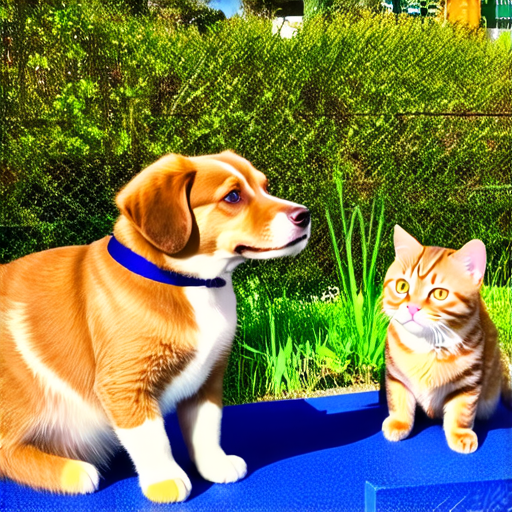

In [10]:
generator = torch.manual_seed(123)
attn_processor = pipe.transformer.attn_processors[names[0]]
attn_processor.reset()
images = pipe(
    "a cat and a dog",
    height=512,
    width=512,
    num_inference_steps=25,
    generator=generator
).images
images[0]

In [12]:
import numpy as np
from PIL import Image
from attention_processor import visualize_attention
attn_processor = pipe.transformer.attn_processors[names[0]]
attn_store = attn_processor.step_attn_store
kwargs = {
    "index": 5
}
visualize_attention(attn_store, 512, False, mode="select", **kwargs)